In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## Basic

### Optimization

In [2]:
from scipy.optimize import minimize

Minimize $$ f(x) = (x-3)^2 $$

In [3]:
def f(x):
    return (x-3)**2
res = minimize(f, 2)  # 2 is the initial guess
print(f'res: \n{res}')
print(f'res.x: \n{res.x}')
print(f'res.[0]: \n{res.x[0]}')

res: 
      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])
res.x: 
[2.99999999]
res.[0]: 
2.999999992549203


Minimize f(x,y) = (x-1)<sup>2</sup> + (y-2.5)<sup>2</sup> subject to
$$x - 2y + 2 >= 0$$
$$-x - 2y + 6 >= 0$$
$$-x + 2y + 2 >= 0$$
$$x >= 0$$
$$y >= 0$$

- 2D function takes in vector x
- Constraints must be specified as g<sub>i</sub>(x) >= 0
- Bounds specified as rectangular

In [4]:
f =  lambda point: (point[0] - 1)**2 + (point[1] - 2.5)**2

constraints = ({'type': 'ineq', 'fun': lambda point: point[0] - 2*point[1] + 2},
        {'type': 'ineq', 'fun': lambda point: -point[0] - 2*point[1] + 6},
        {'type': 'ineq', 'fun': lambda point: -point[0] + 2*point[1] + 2})

bounds = ((0, None), (0, None)) # None = infinity

In [5]:
res = minimize(f, (2, 0), bounds=bounds, constraints=constraints) # (2,0) guess
print(f'res: \n{res}')
print(f'res.x: \n{res.x}')

res: 
     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])
res.x: 
[1.4 1.7]


## Interpolation

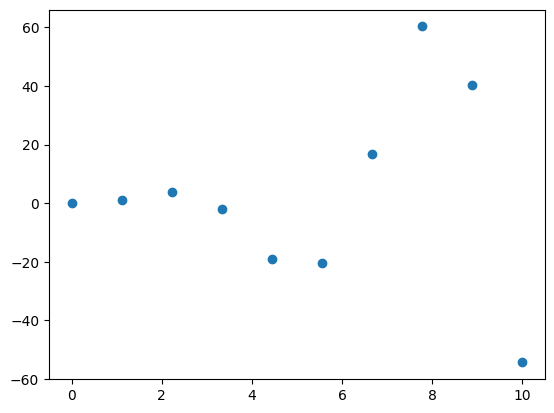

In [6]:
x = np.linspace(0, 10, 10)
y = x**2*np.sin(x)
plt.scatter(x, y)

In [7]:
from scipy.interpolate import interp1d

In [8]:
f = interp1d(x, y, kind='linear')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

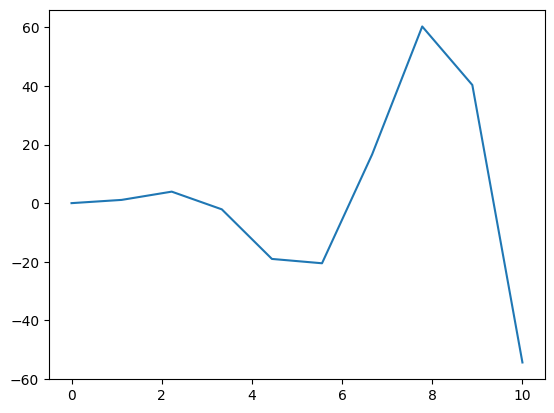

In [9]:
plt.plot(x_dense, y_dense)

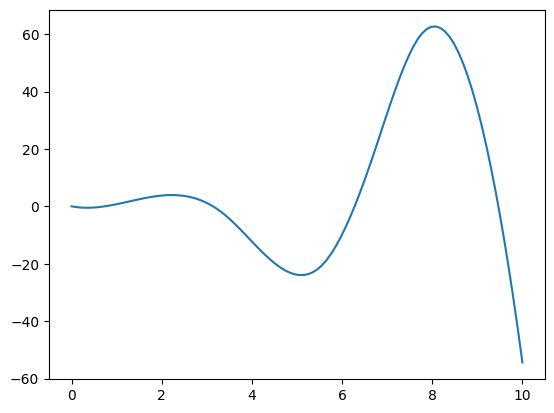

In [10]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)

## Curve Fitting

In [11]:
x_data = np.linspace(0, 10, 10)
y_data = 3*(x_data**2)+2

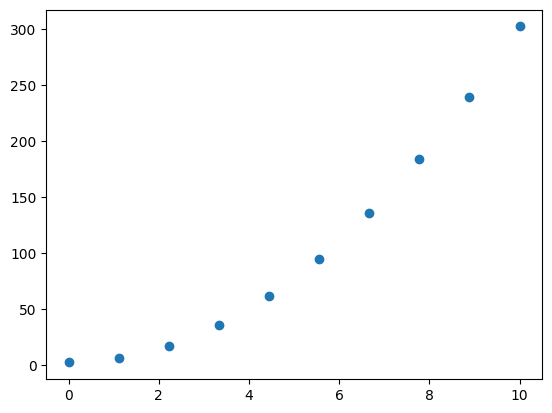

In [12]:
plt.scatter(x_data, y_data)

In [13]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*(x**2) + b

popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1)) # p0 = initial guess

In [14]:
popt, pcov

(array([3., 2.]),
 array([[ 4.13297331e-34, -1.45419433e-32],
        [-1.45419433e-32,  9.65872308e-31]]))

The equation for spring motion is $ y(t) = A cos(\omega t+ \phi) $. Want to find the natural frequency of oscillation  for the spring. You collect the data

In [15]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

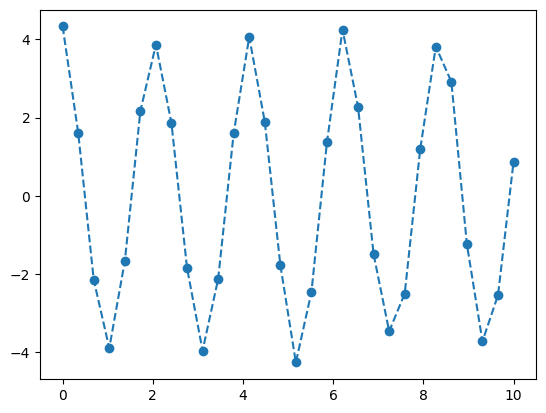

In [16]:
plt.plot(t_data, y_data, 'o--')

$ \omega = 2\pi f , f = \frac{1}{T} $, and $ T \approx $ 2 seconds. Thus good initial guess is
- $ \omega = 2\pi (\frac{1}{2}) = \pi$
- $ A = 4 $
- $ \phi = 0 $

In [17]:
def func(t, A, w, phi):
    return A*np.cos(w*t+phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0)) # p0 = initial guess 

In [18]:
popt, pcov

(array([3.94836219, 2.99899521, 0.10411352]),
 array([[ 2.61882717e-03, -4.94131505e-06,  3.47404558e-05],
        [-4.94131505e-06,  1.85637335e-05, -9.60755036e-05],
        [ 3.47404558e-05, -9.60755036e-05,  6.63423791e-04]]))

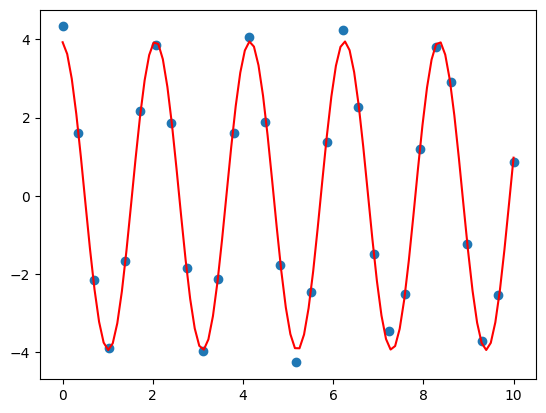

In [19]:
A, w, phi = popt

t = np.linspace(0, 10, 100)
y_fitted = A*np.cos(w*t+phi)

plt.scatter(t_data, y_data)
plt.plot(t, y_fitted, color='r')

## Special Functions
Legendre Polynomials $ P_l(x): $ satisfy $ (1-x^2)y'' - 2xy' + l(l+1)y = 0 $
- The angular momentum of the spherical Schrodinger Equation which permits non-infinite solutions

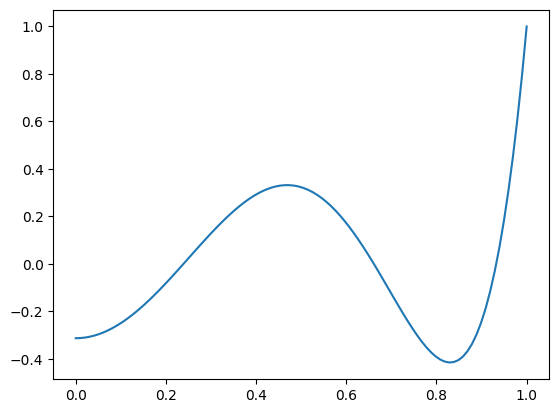

In [20]:
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))
plt.show()

Bessel functions $ J_\alpha (x) $: satisfy $ x^2y'' + xy' + (x^2 - \alpha ^2)y = 0 $
- Laplace's Equation in Polar Coordinates

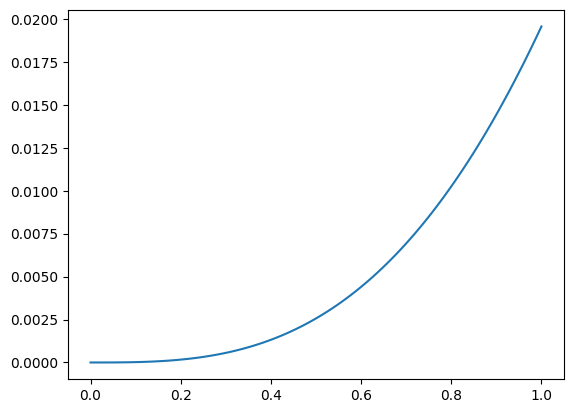

In [21]:
from scipy.special import jv
x = np.linspace(0, 1, 100)
plt.plot(x, jv(3, x))
plt.show()

## Calculus

### Differentiation

In [22]:
from scipy.misc import derivative

In [23]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)
x = np.linspace(0, 1, 100)
y = f(x)
y_prime = derivative(f, x, dx=1e-6)
y_double_prime = derivative(f, x, dx=1e-6, n=2)

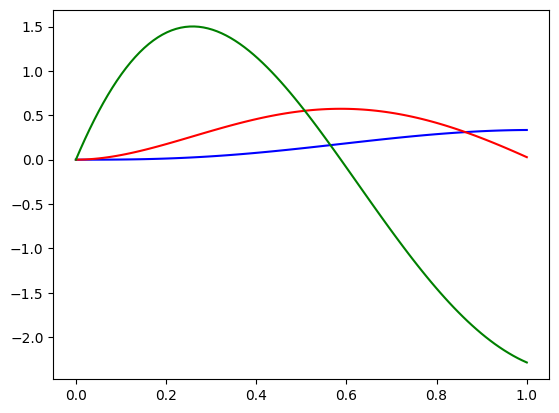

In [24]:
plt.plot(x, y, color='blue')
plt.plot(x, y_prime, color='red')
plt.plot(x, y_double_prime, color='green')

## Integration

Single integrals
$$  \int_{0}^{1} x^2 sin(2x) e^{-x}\,dx $$

In [25]:
from scipy.integrate import quad

integrand = lambda x: (x**2) * np.sin(x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)
integral, integral_error

(0.10246777930717413, 1.1376208786903388e-15)

Double integrals
$$  \int_{0}^{1} \int_{-x}^{x^2} sin((x+y^2)\,dydx $$

In [26]:
from scipy.integrate import dblquad

integrand = lambda y, x: np.sin(x + y**2)
lwr_y = lambda x:-x
upr_y = lambda x:x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)
integral, integral_error

(0.590090324408853, 2.0545915475811425e-14)

In [27]:
# n dimensional integrals
from scipy.integrate import nquad
# ?nquad

## Differential Equations
### First Order ODEs
Air friction while falling
$$ v' - \alpha v^2 + \beta = 0 $$
$$ v(0) = 0 $$

In [28]:
from scipy.integrate import odeint

In [29]:
# alpha = 3
# beta = 5
def dvdt(v, t):
    return 3*(v**2) - 5

v0 = 0

In [30]:
t = np.linspace(0, 1, 100)

sol = odeint(dvdt, v0, t)
# sol

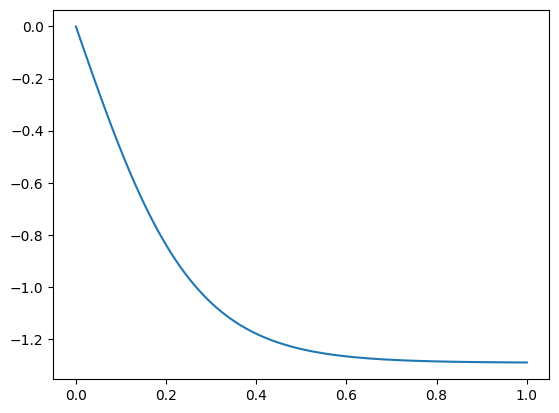

In [31]:
plt.plot(t, sol.T[0])

### Coupled first order ODEs
$$ y'_1 = y_1 + y_2^2 + 3x $$
$$ y'_2 = 3y_1 + y_2^3 - cos(x) $$
$$ y_1(0) = 0 $$
$$ y_2(0) = 0 $$

Letting S = (y1, y2) we need to write a function that returns dS/dx = (dy<sub>1</sub>/dx, dy<sub>2</sub>/dx). The function dS/dx can take S = (y1, y2) and x

In [32]:
def dSdx(S, x):
    y1, y2 = S
    return [ y1 + y2**2 + 3*x,
            3*y1 + y2**3 - np.cos(x)]

y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [33]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)
# sol

In [34]:
y1, y2 = sol.T

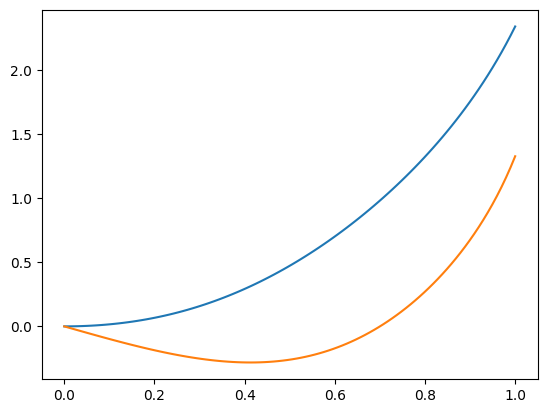

In [35]:
plt.plot(x, y1)
plt.plot(x, y2)

In [36]:
def dSdt(S, t):
    omega, theta = S
    return [ np.sin(theta),
           omega]

omega_0 = 0
theta_0 = np.pi/4
S_0 = (omega_0, theta_0)

t = np.linspace(0, 20, 100)
sol = odeint(dSdt, S_0, t)

In [37]:
omega, theta = sol.T

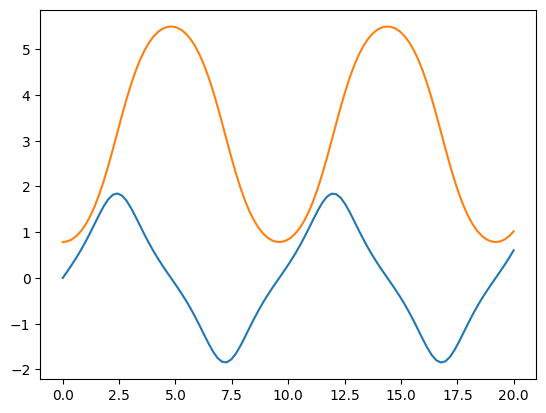

In [38]:
plt.plot(t, omega)
plt.plot(t, theta)

## Fourier Transform

The discrete Fourier transform is defined as 
$$ y[k] = \sum_{n=0}^{\infty} e^{-2\pi in(k/N)}x[n] $$
- k/N represents a specific frequency (dimensionless)
- can be converted to a frequency (Hz) if you know the spacing in x

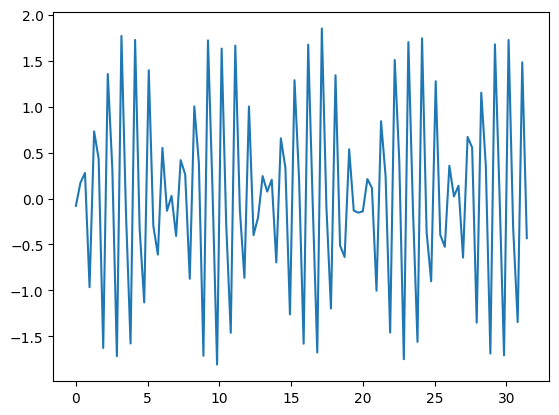

In [39]:
t = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*t) + np.sin(4*np.pi*t) + 0.1*np.random.randn(len(t))
plt.plot(t,x)

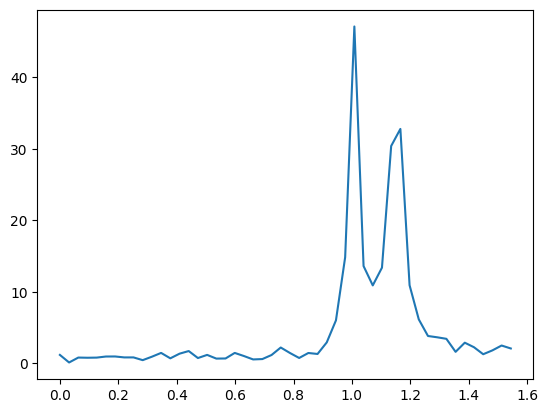

In [40]:
from scipy.fft import fft, fftfreq
N = len(x)
y = fft(x)[:N//2]
f= fftfreq(N, np.diff(t)[0])[:N//2]
plt.plot(f, np.abs(y))

![Ex1](./scipyEx1.png)


Correction: $ F.d\vec{r} = F.d\vec{r}/dt $

In [41]:
def f(A): 
    integrand = lambda t: 2 / (1 + np.abs(A*np.sin(np.pi*t/10)))**2 + 5*np.sqrt(1+(np.pi*A/10)**2 * np.cos(np.pi * t / 10)**2)
    return quad(integrand, 0, 10)[0]

minimize(f, 0.001, method="CG").x

array([1.42591231])

![Ex2](./scipyEx2.png)

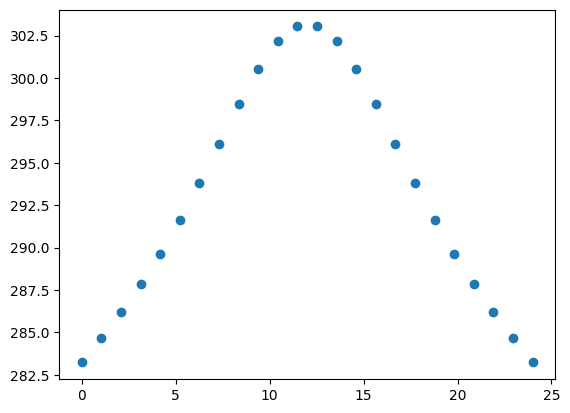

In [42]:
time_m = np.array([ 0.,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ])

temp_s_m = np.array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
       291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
       302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
       298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
       287.8603625, 286.2259041, 284.6945461, 283.2322975])
plt.scatter(time_m, temp_s_m)

In [43]:
Ts = interp1d(time_m, temp_s_m, kind='cubic')

In [44]:
# k = 1/2
def dTdt(T, t):
    return -0.5*(T-Ts(t))

T0 = 284.6945461
times = np.linspace(1, 23, 1000)

NameError: name 'temp_m' is not defined

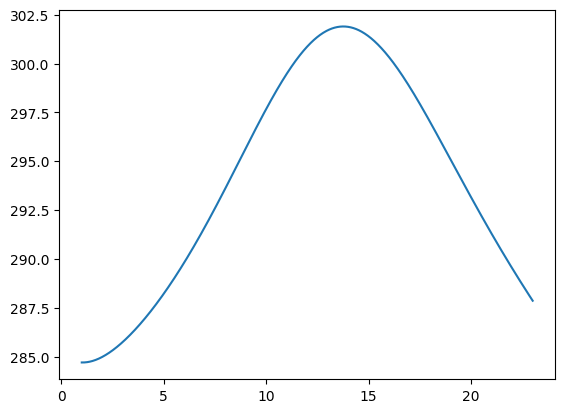

In [45]:
sol = odeint(dTdt, T0, times)
plt.plot(times, sol.T[0])
plt.scatter(time_m, temp_m, color='r')

## Linear Algebra

### Basics

Triangular matrices
$$ \begin{bmatrix}
3 & 0 & 0 & 0\\
2 & 1 & 0 & 0\\
1 & 0 & 1 & 0\\
1 & 1 & 1 & 1
\end{bmatrix} \vec{x} = \begin{bmatrix}
4 \\
2 \\
4 \\
2
\end{bmatrix}$$

In [ ]:
from scipy.linalg import solve_triangular
a = np.array([[3, 0, 0, 0],
              [2, 1, 0, 0],
              [1, 0, 1, 0],
              [1, 1, 1, 1]])
b = np.array([4, 2, 4, 2])
x = solve_triangular(a, b, lower=True)
x

Toeplitz Matrices (matrices with constant diagonals)
$$ \begin{bmatrix}
1 & -1 & 2 & 3\\
3 & 1 & -1 & 2\\
6 & 3 & 1 & -1\\
10 & 6 & 3 & 1
\end{bmatrix} \vec{x} = \begin{bmatrix}
1 \\
2 \\
2 \\
5
\end{bmatrix}$$

In [ ]:
from scipy.linalg import solve_toeplitz, toeplitz

c = np.array([1, 3, 6, 10])    # First column of T
r = np.array([1, -1, -2, -3])  # First row of T
b = np.array([1, 2, 2, 5])

x = solve_toeplitz((c, r), b)
x

### Eigenvalue problems

Eigenvalue problems can be solved using numpy, so here we focus on particular cases for optimization

In [ ]:
from scipy.linalg import eigh_tridiagonal

$$ \begin{bmatrix}
3 & -1 & 0 & 0\\
-1 & 3 & -1 & 0\\
0 & -1 & 3 & -1\\
0 & 0 & -1 & 3
\end{bmatrix} \vec{x} = \lambda x$$

In [ ]:
d = 3*np.ones(4)
e = -1*np.ones(3)
w, v = eigh_tridiagonal(d, e)
w, v.T

In [ ]:
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
A

In [ ]:
A@v.T[0], w[0]*v.T[0]

### Special Matrices
Fiedler matrix where $ A_{i,j} = |a_i - a_j| $
 is some sequence of numbers

In [ ]:
from scipy.linalg import fiedler
fiedler([1, 4, 12, 45])

In [ ]:
from scipy.linalg import toeplitz
toeplitz([1,2,3,6,0,0], [1,4,5,6,0,0]) 

### Decompositions

LU decomposition $A = PLU $ where $P$ is a permutation matrix, $L$ is a lower triangular matrix and $U$ is an upper triangular matrix.

In [ ]:
from scipy.linalg import lu
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
p, l, u = lu(A)
p, l, u

Choleski decomposition: find matrix $C$ such that $A=CC^T$

In [ ]:
from scipy.linalg import cholesky
A = np.array([[1,0.2],[0.2,1]])
C = cholesky(A, lower=True)

In [ ]:
A, C@C.T

## Sparse Matrices
Matrices that contain lots of zeroes

![Sparse Matrices](./sparse_matrices.png)

In [46]:
from scipy.linalg import kron # kronecker product, NOT sum
N= 5
d = -2*np.ones(N)
e = np.ones(N-1)
D = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
D_kronsum = kron(D, np.identity(N)) + kron(np.identity(N),D)
D_kronsum

array([[-4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -4.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
      

In [47]:
from scipy import sparse
N=100
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T = -1/2 * sparse.kronsum(D,D)

## Statistics

<strong>Example 1</strong>: $\beta$ distribution
$$ f(x;a,b) = \frac{\Gamma (a+b) x^{a-1}(1-x)^{b-1}}{\Gamma (a) \Gamma (b)} $$
$$ 0 \leq x \leq 1 $$

In [48]:
from scipy.stats import beta

In [50]:
a, b = 2.5, 3.1
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
# mvsk = mean, var, skew, kurtosis

Probability Distribution Plotting:

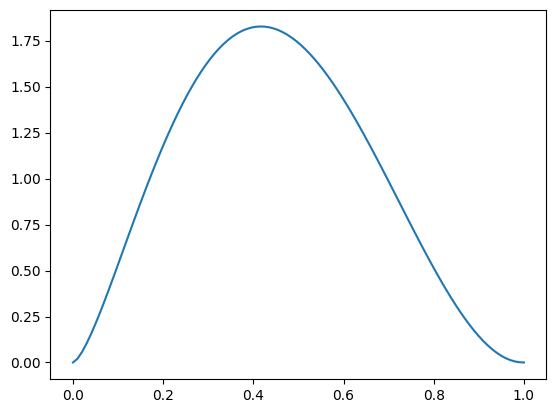

In [51]:
x = np.linspace(beta.ppf(0, a, b), beta.ppf(1, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

Generating Random Variables:

In [52]:
r = beta.rvs(a, b, size=10)
r

array([0.38931412, 0.06475485, 0.02583144, 0.49972759, 0.4124498 ,
       0.55895185, 0.16027371, 0.33981919, 0.57334815, 0.35385442])

<strong>Example 2</strong>: Gaussian distribution

In [53]:
from scipy.stats import norm

In [54]:
mu = 1
sigma = 2
mean, var = norm.stats(loc=mu, scale=sigma, moments='mv')

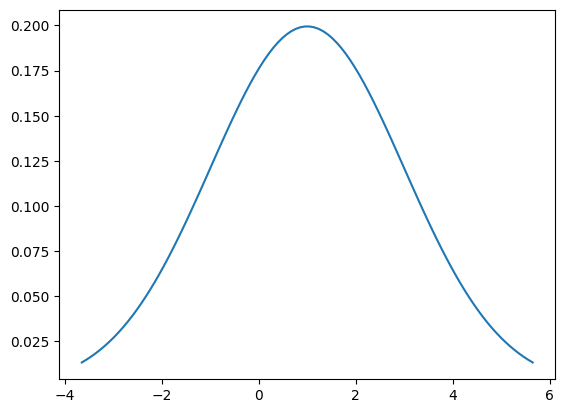

In [55]:
x = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
plt.plot(x, norm.pdf(x, mu, sigma))

<strong>Example 3</strong>: Multinomial distribution
$$ f(x_1, x_2,...,x_k;p_1,p_2,...,p_k,n) = \frac{n!}{x_1!...x_k!}p_1^{x_1}p_2^{x_2}...p_k^{x_k} $$
Rolling a die

In [56]:
from scipy.stats import multinomial

p = np.ones(6)/6
multinomial.pmf([6,0,0,0,0,0], n=6, p=p)

2.143347050754453e-05

In [64]:
multinomial.rvs(n=100, p=p, size=5)

array([[16, 15, 16, 13, 25, 15],
       [16, 21,  8, 17, 14, 24],
       [17, 14, 21, 16, 18, 14],
       [16, 19, 14, 17, 20, 14],
       [14, 13, 17, 20, 16, 20]])

![Ex 4](./Ex4.png)

In [65]:
import scipy.stats as st

class mr_p_solver_dist(st.rv_continuous):
    def _pdf(self,x, a1, a2, b1, b2):
        return 1/(2*(a1*b1+a2*b2))*(b1*np.exp(-np.sqrt(x/a1)) + b2*np.exp(-np.sqrt(x/a2)))
my_rv = mr_p_solver_dist(a=0, b=np.inf)

In [66]:
a1, a2, b1, b2 = 2, 3, 1, 2
x = np.linspace(my_rv.ppf(0.01, a1, a2, b1, b2), my_rv.ppf(0.99, a1, a2, b1, b2), 100)
y = my_rv.pdf(x, a1, a2, b1, b2)

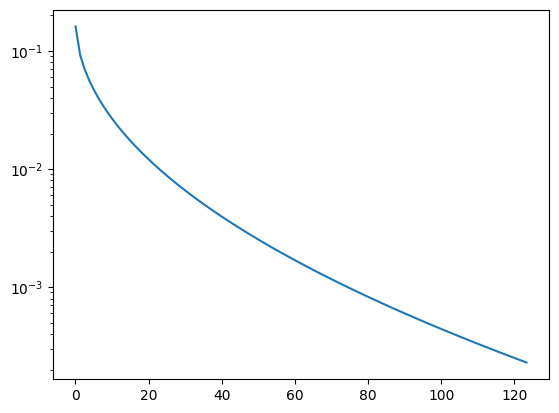

In [67]:
plt.plot(x, y)
plt.semilogy()
plt.show()

In [68]:
my_rv.rvs(a1, a2, b1, b2, size=10)

array([ 1.06232836, 57.8189721 ,  2.75864429,  8.46215568, 15.49442801,
        4.72537123, 14.16881179,  1.04238293,  2.20255018,  1.80233525])

This is slow, so it is typical to define your own _rvs method in the variable class

In [69]:
class mr_p_solver_dist(st.rv_continuous):
    def _pdf(self,x, a1, a2, b1, b2):
        return 1/(2*(a1*b1+a2*b2))*(b1*np.exp(-np.sqrt(x/a1)) + b2*np.exp(-np.sqrt(x/a2)))
    def _cdf(self, x, a1, a2, b1, b2):
        return 1/(2*(a1*b1+a2*b2))* ( -2*a1*b1*(np.sqrt(x/a1)+1)*np.exp(-np.sqrt(x/a1)) \
           -2*a2*b2*(np.sqrt(x/b2)+1)*np.exp(-np.sqrt(x/b2)) \
           + 2*a1*b1 + 2*a2*b2 )
    def _rvs(self, a1, a2, b1, b2, delta=0.001, size=None, random_state=None):
        a_min = min([a1, a2])
        x = np.linspace(0, a_min*np.log(1/delta)**2, 10000)
        r = np.random.rand(size)
        return x[np.searchsorted(self._cdf(x[:-1], a1, a2, b1, b2), r)]

In [70]:
my_rv = mr_p_solver_dist(a=0, b=np.inf)
my_rv._rvs(a1, a2, b1, b2, size=10000)

array([0.14316557, 0.21952053, 0.49630729, ..., 0.82081591, 0.02863311,
       0.62038412])